<h1><strong><u>Assignment 2</u></strong></h1>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler as SS, PolynomialFeatures as PF

<h2><u>Data Preprocessing and Visualization</u></h2>

In [31]:
data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
#remove textual columns
data = data.drop(columns=['ocean_proximity'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [34]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [35]:
display(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [36]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


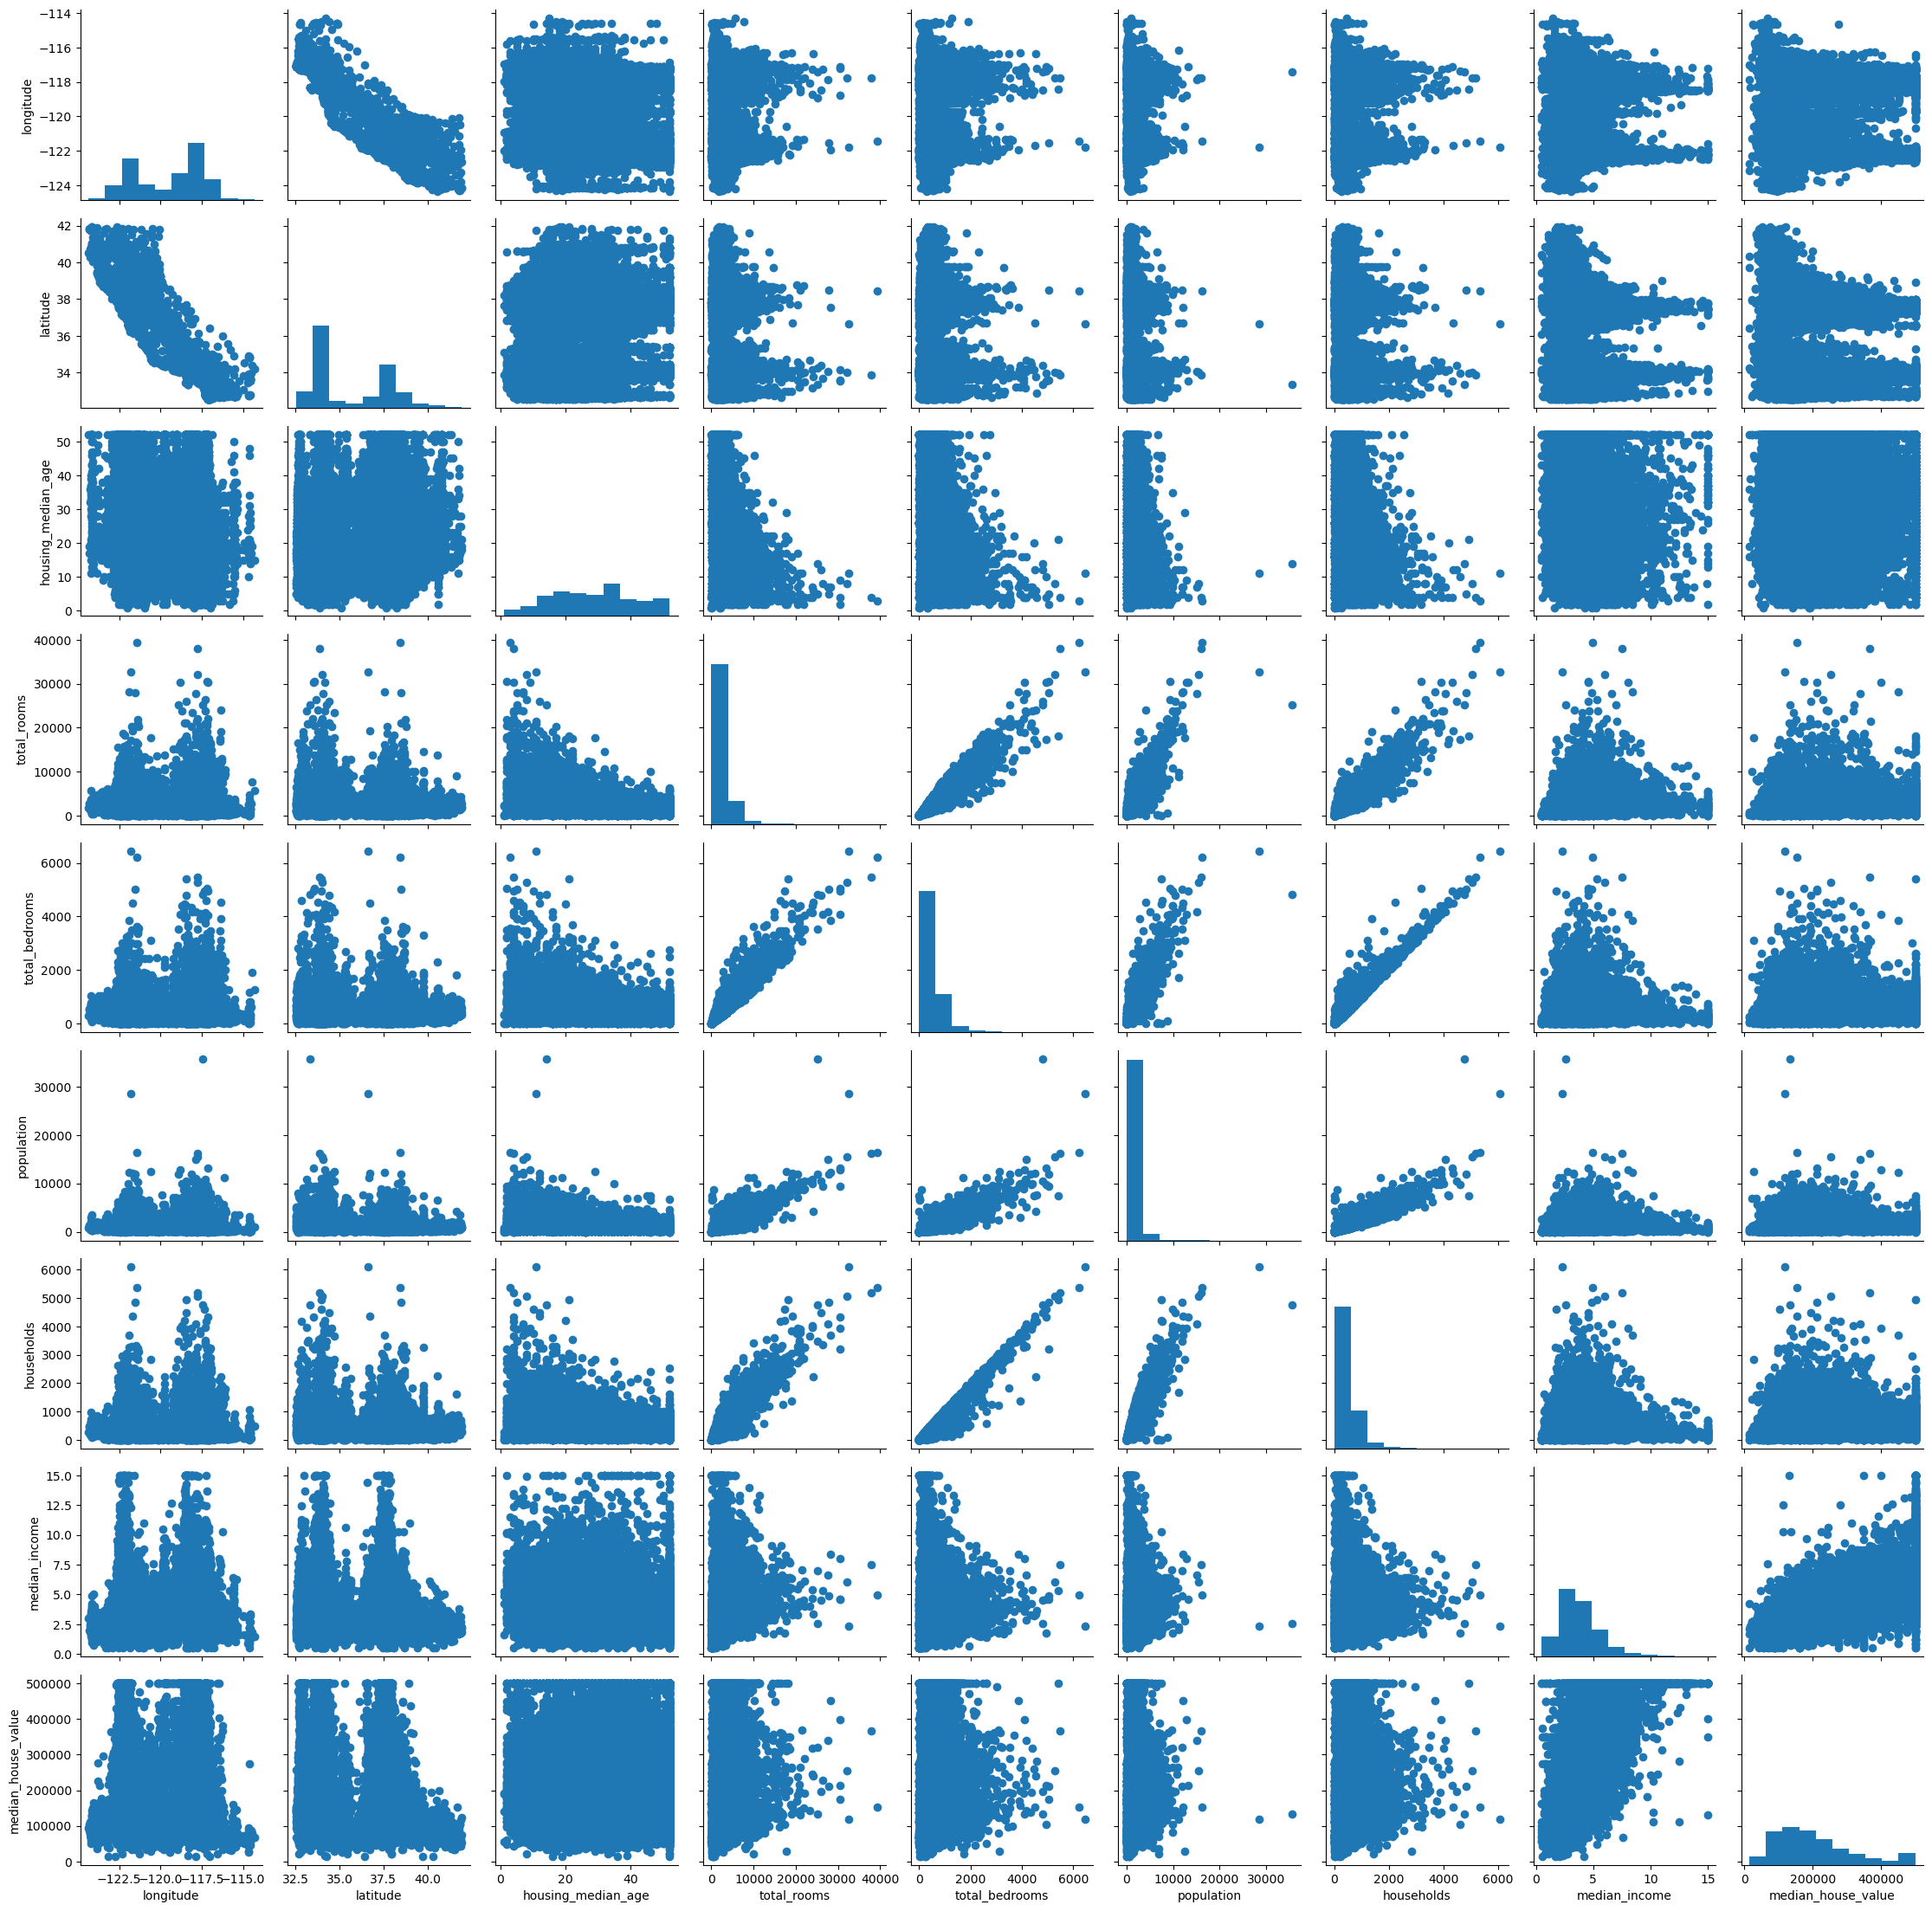

In [38]:
# Display graphs
graphs = sns.PairGrid(data)
graphs.map_diag(plt.hist)
graphs.map_offdiag(plt.scatter)

In [39]:
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
2830,-119.01,35.40,11.0,8739.0,2190.0,4781.0,1919.0,1.7109
14951,-116.96,32.71,18.0,2413.0,533.0,1129.0,551.0,2.4567
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579
14271,-117.12,32.70,38.0,818.0,217.0,953.0,231.0,1.0531
305,-122.18,37.76,43.0,2018.0,408.0,1111.0,367.0,1.8913
...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016
...,...,...,...,...,...,...,...,...
14148,-117.08,32.73,36.0,1158.0,218.0,619.0,233.0,3.6125
14743,-117.06,32.58,11.0,2879.0,679.0,2098.0,673.0,3.5125
19496,-121.00,37.66,43.0,2369.0,413.0,944.0,422.0,3.2632
20553,-121.79,38.68,24.0,3794.0,848.0,2225.0,864.0,2.8068


2830      44600.0
14951    155000.0
8314     450000.0
14271     65700.0
305       91200.0
           ...   
11397    273400.0
12081    160800.0
5447     335400.0
866      231200.0
15948    251800.0
Name: median_house_value, Length: 15324, dtype: float64

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
14148    122500.0
14743    142400.0
19496    138100.0
20553     95300.0
19633    250000.0
Name: median_house_value, Length: 5109, dtype: float64

In [40]:
print(f"X_train shape: {X_train.shape}\n" + 
      f"X_test shape: {X_test.shape}\n" +
      f"y_train shape: {y_train.shape}\n" +
      f"y_test shape: {y_test.shape}")

X_train shape: (15324, 8)
X_test shape: (5109, 8)
y_train shape: (15324,)
y_test shape: (5109,)


In [41]:
print(f"X_train: {type(X_train)}\n" + 
      f"X_test: {type(X_test)}\n" +
      f"y_train: {type(y_train)}\n" +
      f"y_test: {type(y_test)}")

X_train: <class 'pandas.core.frame.DataFrame'>
X_test: <class 'pandas.core.frame.DataFrame'>
y_train: <class 'pandas.core.series.Series'>
y_test: <class 'pandas.core.series.Series'>


<h2><u>Linear Regression Model</u></h2>

In [110]:
training_model = LinearRegression().fit(X_train, y_train)
linear_model_coeff = training_model.coef_
linear_model_intercept = training_model.intercept_
print("intercept: ", linear_model_intercept)
print("coeff: ", linear_model_coeff)

intercept:  -3550575.4851257293
coeff:  [-4.23796917e+04 -4.23167324e+04  1.16634065e+03 -8.48354292e+00
  1.15070266e+02 -3.64956066e+01  4.22100874e+01  4.02569114e+04]


In [ ]:
training_predictions = training_model.predict(X_train)
testing_predictions = training_model.predict(X_test)

<h2><u>Quadratic Model Degree 2</u></h2>

In [63]:
# Apply polynomial transform to training data
polynomial_model_d2 = PF(degree=2, include_bias=False)
polynomial_model_d2.fit(X_train)
X_train_poly_d2 = polynomial_model_d2.transform(X_train)
print(X_train.shape)
print(X_train_poly_d2.shape)

# Apply polynomial transform to testing data
X_test_poly_d2 = polynomial_model_d2.transform(X_test)
print(X_test.shape)
print(X_test_poly_d2.shape)


(15324, 8)
(15324, 44)
(5109, 8)
(5109, 44)


In [64]:
polynomial_d2_linReg = LinearRegression().fit(X_train_poly_d2, y_train)
polynomial_d2_training_predictions = polynomial_d2_linReg.predict(X_train_poly_d2)
polynomial_d2_testing_predictions = polynomial_d2_linReg.predict(X_test_poly_d2)
display(polynomial_d2_linReg.intercept_)
display(polynomial_d2_linReg.coef_)

np.float64(19685547.144692283)

array([ 5.93119486e+05,  9.14632588e+05, -7.26603131e+04,  9.77813053e+02,
       -3.37774426e+03,  4.43731948e+02, -2.85599250e+03, -9.11230698e+05,
        4.14432403e+03,  1.15318450e+04, -8.81175090e+02,  1.26914323e+01,
       -5.12145942e+01,  7.42225225e+00, -3.31313925e+01, -1.17483705e+04,
        6.73011833e+03, -9.53837492e+02,  1.35529760e+01, -6.74986815e+01,
        1.26420234e+01, -3.52114563e+01, -1.23017420e+04,  1.98290790e+01,
       -2.24544523e-01,  2.56440820e+00, -1.38261097e+00,  3.73806064e+00,
        1.51364708e+02, -2.19204967e-03,  3.25286592e-02, -6.83562247e-03,
        1.48307168e-02,  9.43852105e+00, -1.61107202e-01,  4.52490986e-02,
       -1.29784713e-02, -3.84857921e+01,  3.33195194e-03, -3.33874329e-02,
       -4.67489905e+00,  3.25026161e-02,  1.34347446e+01, -2.44480916e+03])

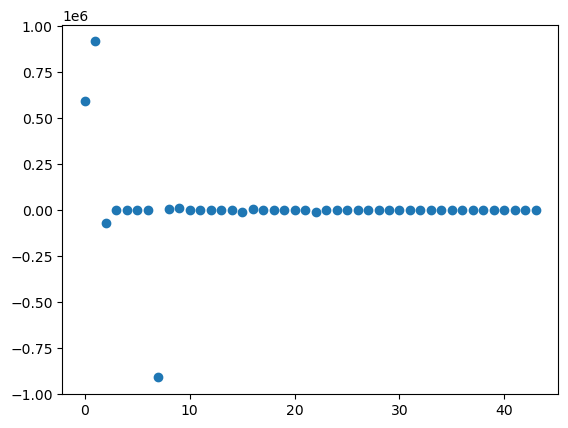

In [65]:
polynomial_d2_coeff = polynomial_d2_linReg.coef_
plt.scatter(range(len(polynomial_d2_coeff)), polynomial_d2_coeff)

<h2><u>Quadratic Model (3rd Degree)</u></h2>

In [68]:
# Apply polynomial transform to training data
polynomial_model_d3 = PF(degree=3, include_bias=False)
polynomial_model_d3.fit(X_train)
X_train_poly_d3 = polynomial_model_d3.transform(X_train)
print(X_train.shape)
print(X_train_poly_d3.shape)

# Apply polynomial transform to testing data
X_test_poly_d3 = polynomial_model_d3.transform(X_test)
print(X_test.shape)
print(X_test_poly_d3.shape)


(15324, 8)
(15324, 164)
(5109, 8)
(5109, 164)


In [69]:
polynomial_d3_linReg = LinearRegression().fit(X_train_poly_d3, y_train)
polynomial_d3_training_predictions = polynomial_d3_linReg.predict(X_train_poly_d3)
polynomial_d3_testing_predictions = polynomial_d3_linReg.predict(X_test_poly_d3)
display(polynomial_d3_linReg.intercept_)
display(polynomial_d3_linReg.coef_)

np.float64(-604824.3562840705)

array([ 4.02032153e-01, -3.10315660e-01, -2.91925100e+00, -1.38510675e-01,
        1.07722729e+00,  7.75244807e+00, -2.90546886e-01, -1.07517210e-01,
       -4.76844054e+01,  2.52768159e+01,  1.80897800e+02,  5.80092985e+01,
       -2.10981123e+01, -9.39340882e+01,  7.16070410e+01,  6.59569058e+00,
       -9.63407375e+00, -5.75587895e+01,  2.17626971e+02,  2.69625115e+01,
       -2.30832657e+02, -2.23757709e+01, -1.87776081e+00, -9.38466664e+01,
        2.43438605e+01, -1.11485885e+02, -1.16472713e+01, -2.31016941e+01,
       -2.91543531e+00,  2.13390744e-01, -1.49972892e+00,  4.18670969e-01,
       -1.02544237e+00, -1.56620217e+02,  6.10885336e-01, -1.06768666e+01,
        3.05859006e+01, -4.15084118e+01, -8.82680544e-02,  8.71104139e+00,
       -3.31812975e+02, -2.34200022e+01, -5.09750120e+01,  4.25173050e+00,
       -5.06323319e+00, -2.66434134e+01, -2.65810325e+00,  7.83598454e-01,
        3.03237900e-02, -8.97632529e-01, -1.16241502e+00, -7.51579179e+00,
       -4.83328834e+01, -

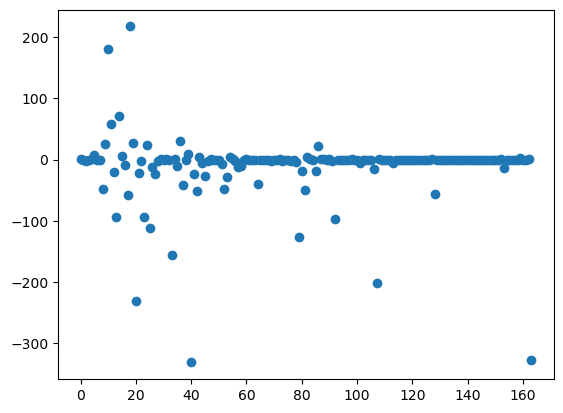

In [70]:
polynomial_d3_coeff = polynomial_d3_linReg.coef_
plt.scatter(range(len(polynomial_d3_coeff)), polynomial_d3_coeff)

<h2><u>Metrics</u></h2>

In [ ]:
#Linear Model Metrics
# Training Data Metrics
mse = mean_squared_error(y_train, training_predictions)
print("Training\nMSE: ", mse)
r2 = r2_score(y_train, training_predictions)
print("R2: ", r2)
# Testing Data Metrics
mse = mean_squared_error(y_test, testing_predictions)
print("\nTesting\nMSE: ", mse)
r2 = r2_score(y_test, testing_predictions)
print("R2: ", r2)

Training
MSE:  4856369227.185733
R2:  0.633666279860611

Testing
MSE:  4768773463.3784685
R2:  0.6475101672486199


In [ ]:
# Quadratic Model Degree 2 Metrics
# Training Data Metrics
mse = mean_squared_error(y_train, polynomial_d2_training_predictions)
print("Training\nMSE: ", mse)
r2 = r2_score(y_train, polynomial_d2_training_predictions)
print("R2: ", r2)
# Testing Data Metrics
mse = mean_squared_error(y_test, polynomial_d2_testing_predictions)
print("\nTesting\nMSE: ", mse)
r2 = r2_score(y_test, polynomial_d2_testing_predictions)
print("R2: ", r2)

Training
MSE:  4001389029.656047
R2:  0.6981605680323659

Testing
MSE:  4057920298.1998463
R2:  0.7000537647226514


In [ ]:
# Quadratic Model Degree 3 Metrics
# Training Data Metrics
mse = mean_squared_error(y_train, polynomial_d3_training_predictions)
print("Training\nMSE: ", mse)
r2 = r2_score(y_train, polynomial_d3_training_predictions)
print("R2: ", r2)
# Testing Data Metrics
mse = mean_squared_error(y_test, polynomial_d3_testing_predictions)
print("\nTesting\nMSE: ", mse)
r2 = r2_score(y_test, polynomial_d3_testing_predictions)
print("R2: ", r2)

Training
MSE:  3489555677.789544
R2:  0.7367700326568929

Testing
MSE:  3833170579.2706485
R2:  0.7166664202502526


<p style="font-size: 16px">After comparing all three sets of metrics calculated using the models above, it can be found that the Polynomial Model of Degree 3 has the better metrics than the other two models. In terms of generalization, I believe that the model does well because as the degree of the polynomial increase, so does the r-squared value.</p>

<h2><u>SGDRegressor Model</u></h2>

In [106]:
# Try feature scaling
X = data.drop(columns=['median_house_value'])
scaler = SS()
scaler.fit(X)
x_scaled = scaler.transform(X)
data_scaled = pd.DataFrame(x_scaled, columns=X.columns)
data_scaled['median_house_value'] = data['median_house_value']
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
# display(X_train_scaled)
# display(X_test_scaled)
# display(y_train)
# display(y_test)

In [116]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, alpha=0, learning_rate='constant', eta0=0.01)
sgd.fit(X_train_scaled, y_train)
sgd_training_predictions = sgd.predict(X_train_scaled)
sgd_testing_predictions = sgd.predict(X_test_scaled)

In [117]:
sgd_coef = sgd.coef_
sgd_intercept = sgd.intercept_

<h2><u>SGDRegression Metrics</u></h2>

In [118]:
# Training Data Metrics
mse = mean_squared_error(y_train, sgd_training_predictions)
print("Training\nMSE: ", mse)
r2 = r2_score(y_train, sgd_training_predictions)
print("R2: ", r2)
# Testing Data Metrics
mse = mean_squared_error(y_test, sgd_testing_predictions)
print("\nTesting\nMSE: ", mse)
r2 = r2_score(y_test, sgd_testing_predictions)
print("R2: ", r2)

Training
MSE:  5283677191.433489
R2:  0.6014328748485331

Testing
MSE:  5243920010.0195265
R2:  0.6123891181897603


In [119]:
print(f"Linear Regression Intercept: {linear_model_intercept}" +
        f"\nSGD Regression Intercept: {sgd_intercept}" +
        f"\n\nLinear Regression Coefficients: {linear_model_coeff}" +
        f"\nSGD Regression Coefficients: {sgd_coef}")

Linear Regression Intercept: -3550575.4851257293
SGD Regression Intercept: [201512.20264012]

Linear Regression Coefficients: [-4.23796917e+04 -4.23167324e+04  1.16634065e+03 -8.48354292e+00
  1.15070266e+02 -3.64956066e+01  4.22100874e+01  4.02569114e+04]
SGD Regression Coefficients: [-90588.77672154 -84932.84274731  17365.83923714 -24056.28573832
  39029.54421512  -1585.68532004  -4064.09271783  74765.92424083]


<p style="font-size: 16px">From looking at the coefficients and the intercepts of both the Linear Regression and the SGD Regression model, I believe they both work similarly with a slight edge being to the original Linear Regression model. One thing I would note is that the SGDRegression behaved better with scaled than unscaled data.</p>